## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
summ_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = 'outer')
summ_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = summ_df.groupby("Drug Regimen")

avg = regimen["Tumor Volume (mm3)"].mean()
med = regimen["Tumor Volume (mm3)"].median()
var = regimen["Tumor Volume (mm3)"].var()
std = regimen["Tumor Volume (mm3)"].std()
sem_val= regimen["Tumor Volume (mm3)"].sem()

sum_stats = pd.DataFrame({"Mean TV": avg, "Median TV": med, "Variance TV": var, 
                          "Standard Deviation TV": std, "SEM TV": sem_val})
sum_stats


,Mean TV,Median TV,Variance TV,Standard Deviation TV,SEM TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

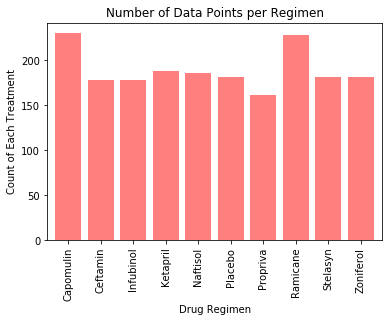

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame down only to those columns to chart
new_df = regimen["Mouse ID"].count()
# Use DataFrame.plot() in order to create a bar chart of the data
new_df.plot(kind="bar", color='r', alpha=0.5, align="center", width = .8)

#Design Chart
plt.title("Number of Data Points per Regimen")
plt.ylabel("Count of Each Treatment")

plt.show()

Text(0, 0.5, 'Count of Each Treatment')

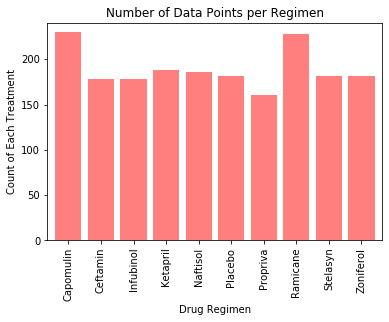

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Set axis and tick locations
y_axis = regimen["Mouse ID"].count()
x_axis = np.arange(len(regimen))
tick_locations = [value for value in x_axis]
#plot graph using pyplot
plt.bar(x_axis,y_axis, color='r', alpha=0.5, align="center")
plt.xlim(-.65, len(x_axis)-.37)
plt.ylim(0,max(y_axis)+10)
plt.title("Number of Data Points per Regimen")
plt.xticks(tick_locations, y_axis.index.values, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Each Treatment")

## Pie plots

Text(0.5, 1.0, 'Amount of Male vs. Female Mice')

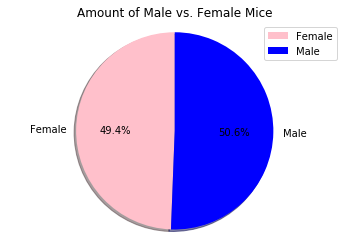

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
female = summ_df.loc[summ_df["Sex"]=="Female"]
fem_count = female["Sex"].count()
male = summ_df.loc[summ_df["Sex"]=="Male"]
male_count = male["Sex"].count()

gender = ["Female","Male"]
gender_count = [fem_count, male_count]
colors= ["pink", "blue"]
genders_df = pd.DataFrame({"": [fem_count,male_count]}, index = gender)

plot = genders_df.plot.pie(subplots = True, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.axis("equal")
plt.title("Amount of Male vs. Female Mice")


Text(0.5, 1.0, 'Amount of Male vs. Female Mice')

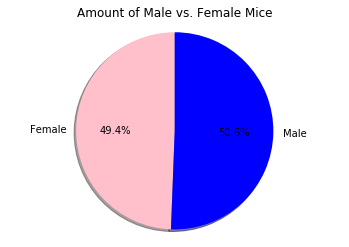

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female = summ_df.loc[summ_df["Sex"]=="Female"]
fem_count = female["Sex"].count()
male = summ_df.loc[summ_df["Sex"]=="Male"]
male_count = male["Sex"].count()

gender = ["Female","Male"]
gender_count = [fem_count, male_count]
colors= ["pink", "blue"]

plt.pie(gender_count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Amount of Male vs. Female Mice")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen